<a href="https://colab.research.google.com/github/NeoZ666/EDA-for-Traffic-Density-Dataset/blob/main/ML_CA_23_2_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/futuristic_city_traffic.csv")
print(df)

                 City        Vehicle Type                Weather  \
0        SolarisVille               Drone                  Snowy   
1            AquaCity          Flying Car            Solar Flare   
2           Neuroburg  Autonomous Vehicle            Solar Flare   
3           Ecoopolis               Drone                  Clear   
4            AquaCity  Autonomous Vehicle            Solar Flare   
...               ...                 ...                    ...   
1219562  SolarisVille  Autonomous Vehicle  Electromagnetic Storm   
1219563   MetropolisX               Drone                  Snowy   
1219564     Neuroburg  Autonomous Vehicle                  Snowy   
1219565   MetropolisX  Autonomous Vehicle                  Clear   
1219566     Ecoopolis               Drone  Electromagnetic Storm   

        Economic Condition Day Of Week  Hour Of Day     Speed  Is Peak Hour  \
0                   Stable      Sunday           20   29.4268             0   
1                Recessio

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nColumns: {col}")
    print(df[col].unique())


Columns: City
['SolarisVille' 'AquaCity' 'Neuroburg' 'Ecoopolis' 'TechHaven'
 'MetropolisX']

Columns: Vehicle Type
['Drone' 'Flying Car' 'Autonomous Vehicle' 'Car']

Columns: Weather
['Snowy' 'Solar Flare' 'Clear' 'Rainy' 'Electromagnetic Storm']

Columns: Economic Condition
['Stable' 'Recession' 'Booming']

Columns: Day Of Week
['Sunday' 'Wednesday' 'Thursday' 'Saturday' 'Monday' 'Friday' 'Tuesday']


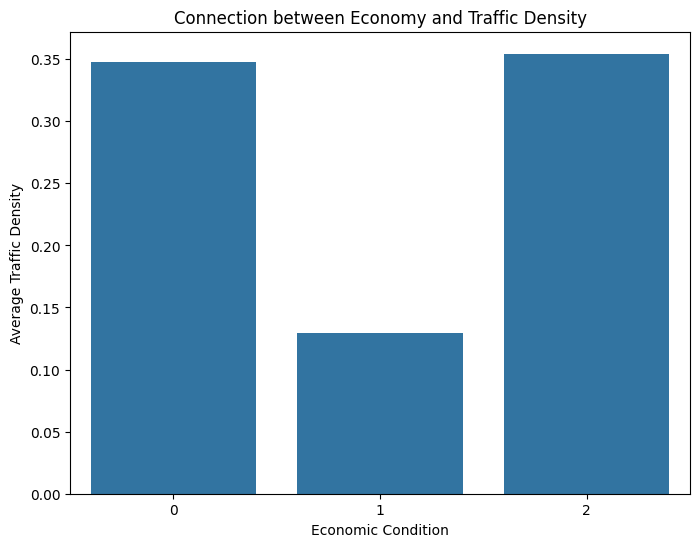

In [ ]:
# @title Using Barplot to find relationship between Economy and Traffic Density in whole dataset
# @markdown <h1>As we can see : The Traffic Density drastically drops down during Recession. However, the surprising part is, it remains stable during both Booming and Stable Economic periods<h1/>
# Preprocess these categorical columns :-

df['Weather'] = df['Weather'].replace({'Snowy': 0, 'Solar Flare': 1, 'Clear': 2, 'Rainy': 3, 'Electromagnetic Storm': 4})
df['Economic Condition'] = df['Economic Condition'].replace({'Stable': 0, 'Recession': 1, 'Booming': 2})
df['Day Of Week'] = df['Day Of Week'].replace({'Sunday': 0, 'Wednesday': 1, 'Thursday': 2, 'Saturday': 3, 'Monday': 4, 'Friday': 5, 'Tuesday': 6})


grouped_data = df.groupby('Economic Condition')['Traffic Density'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel('Economic Condition')
plt.ylabel('Average Traffic Density')
plt.title('Connection between Economy and Traffic Density')
plt.show()

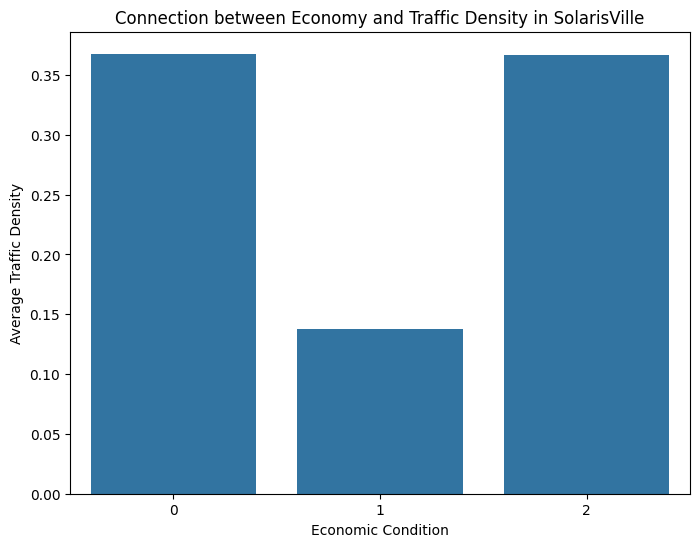

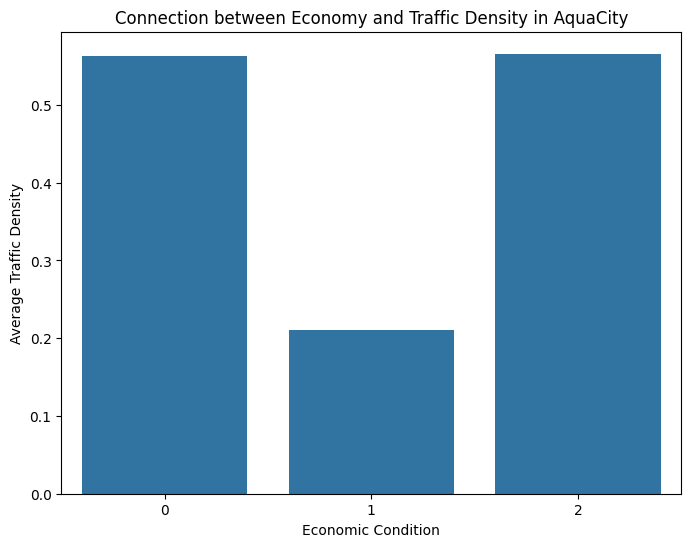

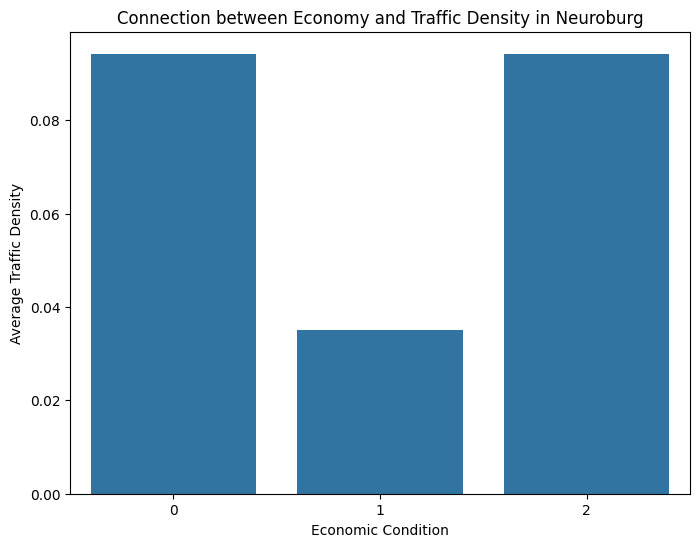

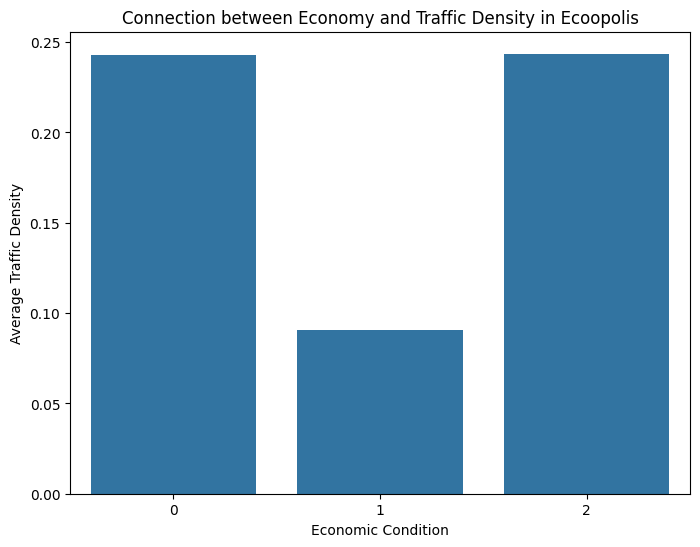

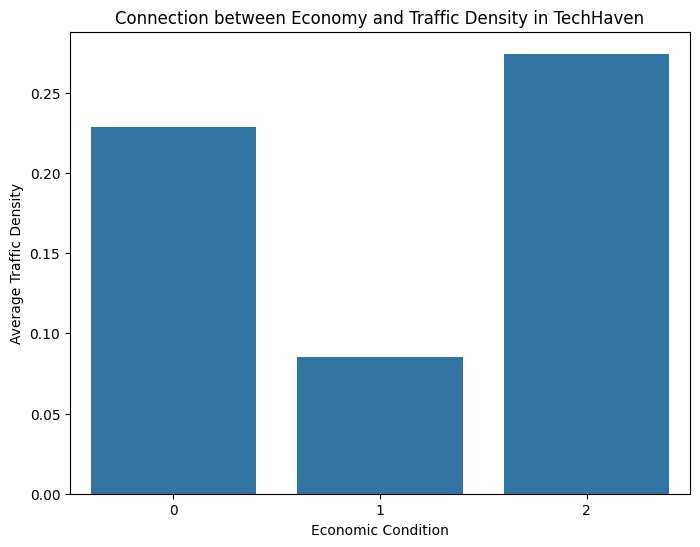

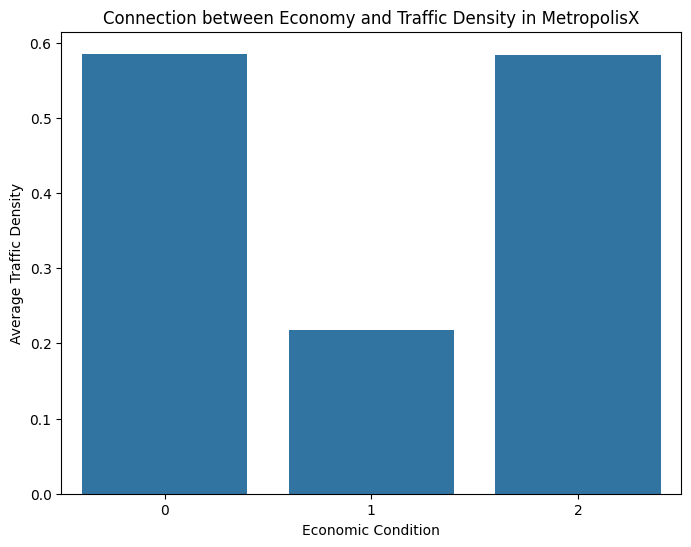

In [ ]:
# We have found relation between economic condition and traffic but this time for specific cities

# Group data by city
grouped_data_by_city = df.groupby('City')['Traffic Density'].mean()

for city in df['City'].unique():
    city_data = df[df['City'] == city]
    grouped_data = city_data.groupby('Economic Condition')['Traffic Density'].mean()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=grouped_data.index, y=grouped_data.values)
    plt.xlabel('Economic Condition')
    plt.ylabel('Average Traffic Density')
    plt.title(f'Connection between Economy and Traffic Density in {city}')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-34-487569ee9535>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data['Cluster'], y=grouped_data['Traffic Density'], palette='viridis')


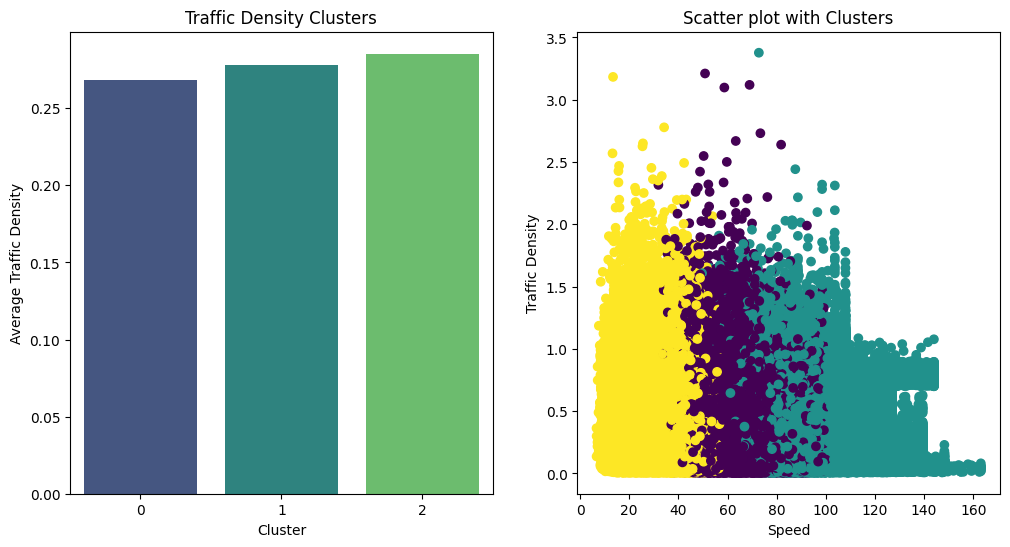

In [ ]:
# @title Using kmeans to cluster the labels vs Traffic Density & Scatter Plot with Speed vs Traffic Density Graph
# @markdown <h1>As we can see : There is a lot of overlapping for the 3 clusters given the number of features for X. On the other hand, the scatterplot clearly shows the distribution of the Speed variables vs Density, while also highlighting the clear outliers. <h1/>

from sklearn.cluster import KMeans

features = ['Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred', 'Energy Consumption']

X = df[features]

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

df['Cluster'] = labels

grouped_data = df.groupby('Cluster')['Traffic Density'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=grouped_data['Cluster'], y=grouped_data['Traffic Density'], hue=X ,palette='viridis' legend=alse)
plt.xlabel('Cluster')
plt.ylabel('Average Traffic Density')
plt.title('Traffic Density Clusters')

plt.subplot(1, 2, 2)
plt.scatter(X['Speed'], df['Traffic Density'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Speed')
plt.ylabel('Traffic Density')
plt.title('Scatter plot with Clusters')

plt.show()

In [ ]:

dfM = df[df["City"] == "MetropolisX"]
dfA = df[df["City"] == "Aquacity"]
dfN = df[df["City"] == "Neuroburg"]
dfE = df[df["City"] == "Ecoopolis"]
dfT = df[df["City"] == "TechHaven"]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-40-a74c3d3aa048>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfM['Cluster'] = labels


<Figure size 1500x1000 with 0 Axes>

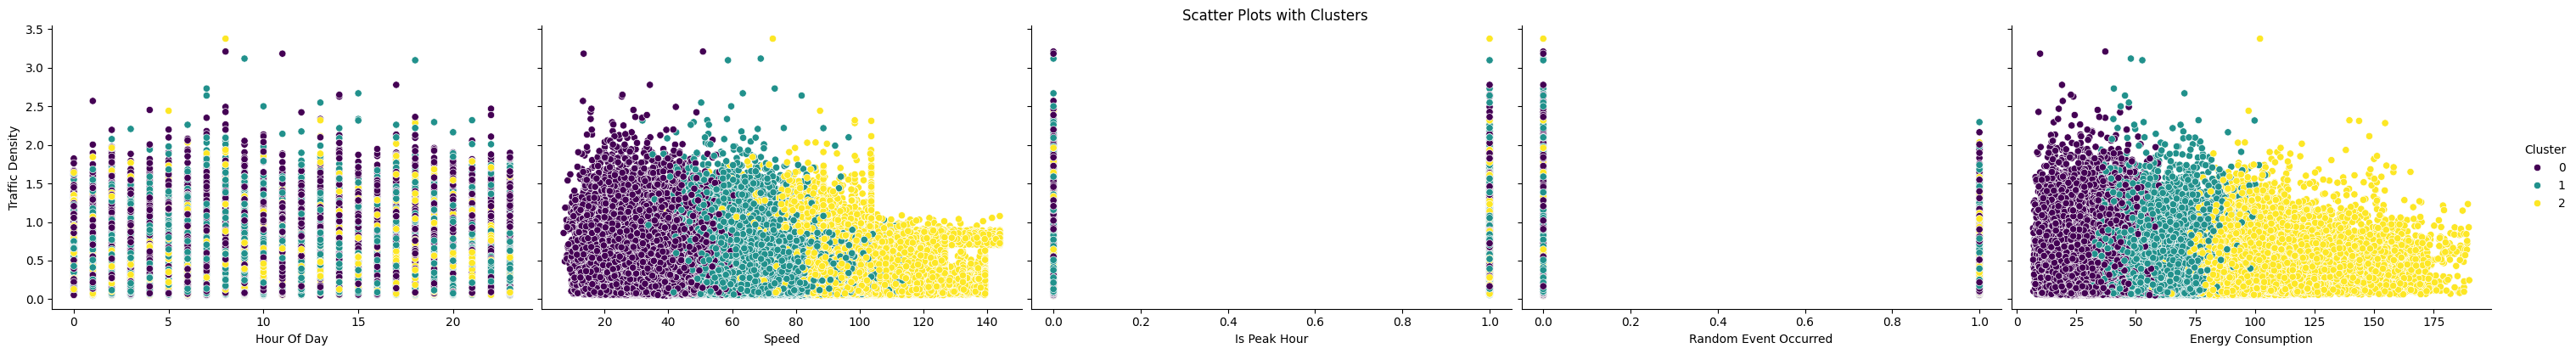

In [ ]:
# @title Using pairplot to basically do all the plotting from the sns library in one go
# @markdown <h1>As we can see : We can see correlation between all the individual features and the traffic density variable, this along with Correlation matrix gives us a hint about the stong and the weaker learners for XGboost which we will do next. <h1/>


from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred', 'Energy Consumption']
X = dfM[features]

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

dfM['Cluster'] = labels

plt.figure(figsize=(15, 10))
sns.pairplot(dfM, hue='Cluster', x_vars=features, y_vars='Traffic Density', height=4, aspect=1.5, palette='viridis')
plt.suptitle('Scatter Plots with Clusters', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


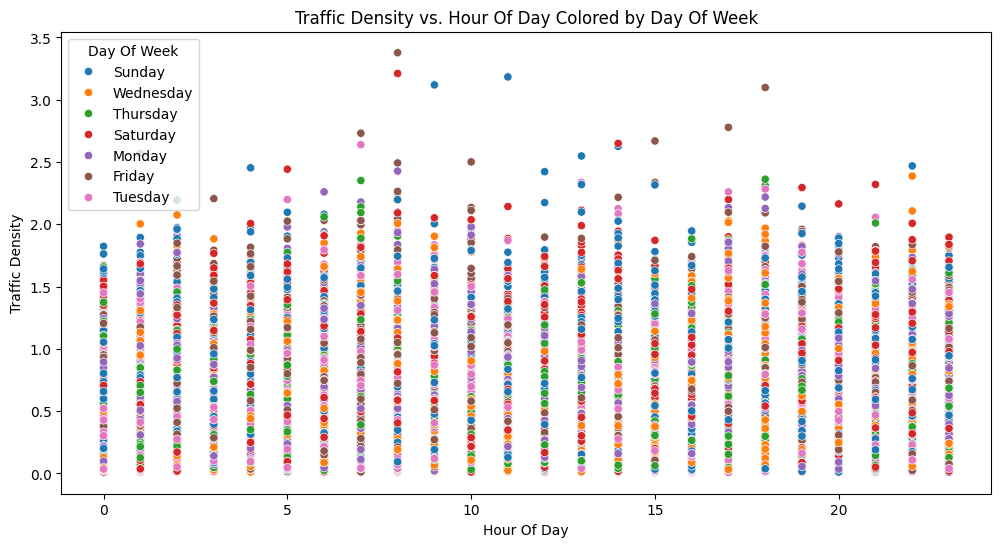

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Hour Of Day', y='Traffic Density', data=df, hue='Day Of Week')
plt.title('Traffic Density vs. Hour Of Day Colored by Day Of Week')
plt.show()

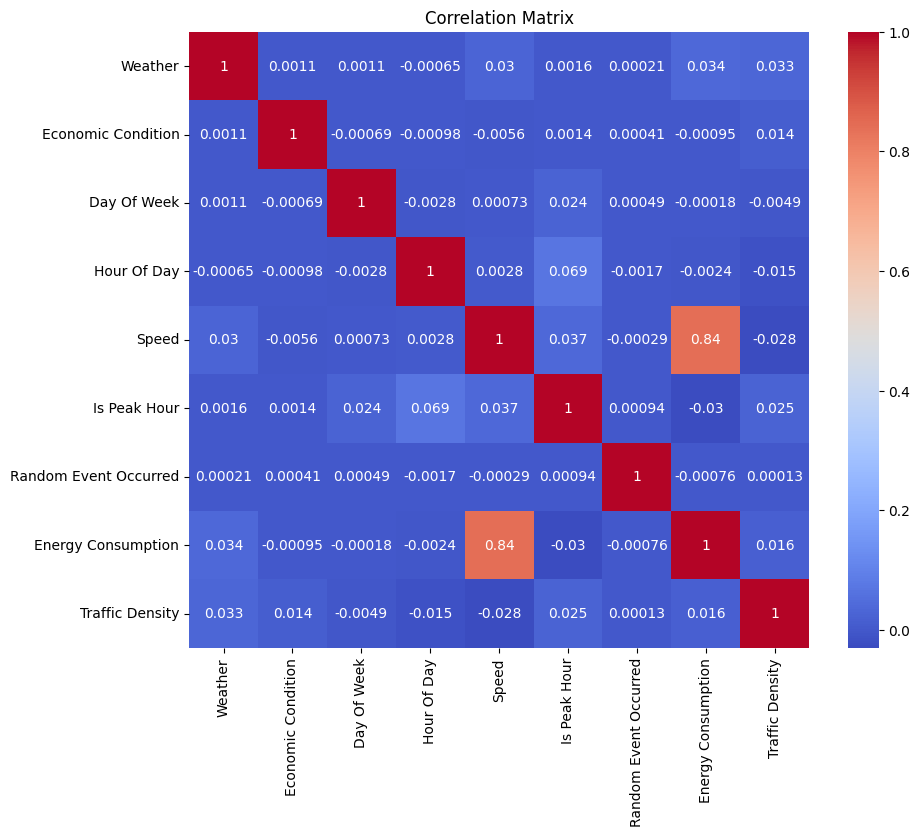

In [ ]:
df['Weather'] = df['Weather'].replace({'Snowy': 0, 'Solar Flare': 1, 'Clear': 2, 'Rainy': 3, 'Electromagnetic Storm': 4})
df['Economic Condition'] = df['Economic Condition'].replace({'Stable': 0, 'Recession': 1, 'Booming': 2})
df['Day Of Week'] = df['Day Of Week'].replace({'Sunday': 0, 'Wednesday': 1, 'Thursday': 2, 'Saturday': 3, 'Monday': 4, 'Friday': 5, 'Tuesday': 6})


numeric_data = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


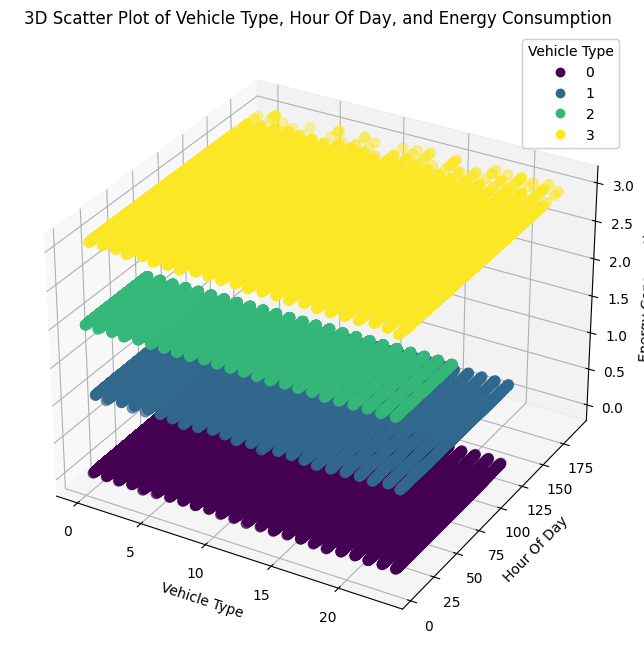

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

eda_df = df[['Vehicle Type', 'Hour Of Day', 'Energy Consumption']]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(eda_df['Hour Of Day'], eda_df['Energy Consumption'], eda_df['Vehicle Type'].astype('category').cat.codes, c=eda_df['Vehicle Type'].astype('category').cat.codes, cmap='viridis', s=50)

ax.set_ylabel('Hour Of Day')
ax.set_zlabel('Energy Consumption')
ax.set_xlabel('Vehicle Type')
ax.set_title('3D Scatter Plot of Vehicle Type, Hour Of Day, and Energy Consumption')

legend1 = ax.legend(*scatter.legend_elements(), title='Vehicle Type')
ax.add_artist(legend1)

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_encoded = pd.get_dummies(df, columns=['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week'])
X = df_encoded.drop('Traffic Density', axis=1)
y = df_encoded['Traffic Density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.06661931897012928
Mean Squared Error: 0.010140053358604684


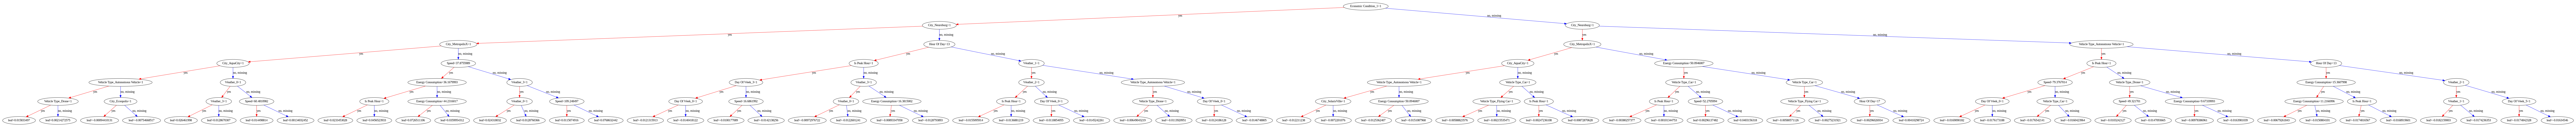

<Figure size 640x480 with 0 Axes>

In [67]:
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(200, 200))
plot_tree(xgb_model, num_trees=4, ax=ax)
plt.show()
plt.savefig("temp.jpeg")

In [ ]:
importances = xgb_model.feature_importances_
feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')

City_Neuroburg: 0.4406502842903137
City_AquaCity: 0.19219546020030975
Economic Condition_1: 0.1575264185667038
City_SolarisVille: 0.0493936724960804
City_MetropolisX: 0.0463501513004303
Weather_1: 0.031754910945892334
Vehicle Type_Autonomous Vehicle: 0.014922267757356167
Vehicle Type_Drone: 0.01351221464574337
City_Ecoopolis: 0.00900498777627945
City_TechHaven: 0.00798556674271822
Weather_3: 0.005843774881213903
Weather_0: 0.004728992003947496
Is Peak Hour: 0.0043262094259262085
Vehicle Type_Flying Car: 0.0034456574358046055
Economic Condition_0: 0.0030435589142143726
Vehicle Type_Car: 0.0029479404911398888
Speed: 0.002158520510420203
Energy Consumption: 0.0020333013962954283
Weather_2: 0.0016010790131986141
Hour Of Day: 0.001344048185274005
Day Of Week_0: 0.0011690810788422823
Day Of Week_3: 0.0010343559551984072
Weather_4: 0.001016753725707531
Economic Condition_2: 0.0006708560977131128
Day Of Week_5: 0.000596881378442049
Day Of Week_4: 0.0001747410569805652
Day Of Week_1: 0.00016573